# Naive Bayes Classifier Model

In [56]:
# Importing all necessary libraries
import pandas as pd
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree 
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Loading the dataset
new_df = pd.read_csv("final_df4.csv")

In [58]:
new_df.head()

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
1,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
2,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
3,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
4,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella


In [59]:
new_df.isnull().sum()

driver_number        0
position             0
points               0
grid                 0
laps                 0
status               0
driver_id            0
constructor_id       0
fastest_lap_rank     0
fastest_lap          0
fastest_lap_time     0
fastest_lap_speed    0
raceName             0
date                 0
season               0
driverId             0
dateOfBirth          0
nationality          0
driverFullName       0
dtype: int64

In [60]:
# Aggregate season data for each driver
season_summary = new_df.groupby(['season', 'driver_id']).agg(
    total_points=pd.NamedAgg(column='points', aggfunc='sum'),
    total_wins=pd.NamedAgg(column='position', aggfunc=lambda x: (x==1).sum()),  # Count wins
    total_podiums=pd.NamedAgg(column='position', aggfunc=lambda x: (x<=3).sum()),  # Count podiums
    average_finish_position=pd.NamedAgg(column='position', aggfunc='mean'),
    races_participated=pd.NamedAgg(column='raceName', aggfunc='count')  # Count races participated
).reset_index()

# Determine the driver with the highest points in each season as the champion
season_summary['is_champion'] = season_summary.sort_values(['season', 'total_points'], ascending=[True, False]).groupby(['season']).cumcount() == 0

# Convert boolean 'is_champion' to binary format: 1 for champions, 0 for others
season_summary['is_champion'] = season_summary['is_champion'].astype(int)

In [61]:
champion_rows = season_summary[season_summary['is_champion'] == 1]
champion_rows

,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated,is_champion
14,2000,michael_schumacher,108.0,9,12,5.294118,17,1
38,2001,michael_schumacher,123.0,9,14,3.352941,17,1
60,2002,michael_schumacher,144.0,11,17,1.411765,17,1
84,2003,michael_schumacher,93.0,6,8,4.250000,16,1
109,2004,michael_schumacher,148.0,13,15,2.611111,18,1
122,2005,alonso,133.0,7,15,3.631579,19,1
149,2006,alonso,134.0,7,14,3.555556,18,1
190,2007,raikkonen,110.0,6,12,4.235294,17,1
209,2008,hamilton,98.0,5,10,5.222222,18,1
229,2009,button,95.0,6,9,4.352941,17,1


## Preparing the dataset for model training

In [62]:
X = season_summary.drop(['season', 'driver_id', 'is_champion'], axis=1)
y = season_summary['is_champion']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
y_test

514    0
70     0
131    0
422    0
545    0
      ..
75     0
250    0
531    0
509    0
68     0
Name: is_champion, Length: 115, dtype: int64

### Step 1: Model Training

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

MultinomialNB()

### Step 2: Model Prediction

In [66]:
# Making predictions on the test set
y_pred = nb_classifier.predict(X_test)

### Step 3: Evaluating the Model

In [67]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 89.57%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       109
           1       0.33      1.00      0.50         6

    accuracy                           0.90       115
   macro avg       0.67      0.94      0.72       115
weighted avg       0.97      0.90      0.92       115

Confusion Matrix:
 [[97 12]
 [ 0  6]]


In [68]:
# Initialize the classifiers
gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()

# Train the models
gaussian_nb.fit(X_train, y_train)
multinomial_nb.fit(X_train, y_train)

# Make predictions
y_pred_gaussian = gaussian_nb.predict(X_test)
y_pred_multinomial = multinomial_nb.predict(X_test)

# Calculate and print accuracies
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)

print(f'Gaussian Naive Bayes Accuracy: {accuracy_gaussian*100:.2f}%')
print(f'Multinomial Naive Bayes Accuracy: {accuracy_multinomial*100:.2f}%')

Gaussian Naive Bayes Accuracy: 95.65%
Multinomial Naive Bayes Accuracy: 89.57%


In [69]:
# Assuming X_train and X_test are your training and testing feature sets
# Convert your features to a binary format using Binarizer
binarizer = Binarizer(threshold=4).fit(X_train) 
X_train_binary = binarizer.transform(X_train)
X_test_binary = binarizer.transform(X_test)

# Initialize the Bernoulli Naive Bayes classifier
bernoulli_nb = BernoulliNB()

# Train the model
bernoulli_nb.fit(X_train_binary, y_train)

# Predict on the test set
y_pred_bernoulli = bernoulli_nb.predict(X_test_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_bernoulli )

print(f'Bernoulli Naive Bayes Accuracy: {accuracy*100:.2f}%')

Bernoulli Naive Bayes Accuracy: 99.13%


Gaussian Naive Bayes Accuracy: 95.65%


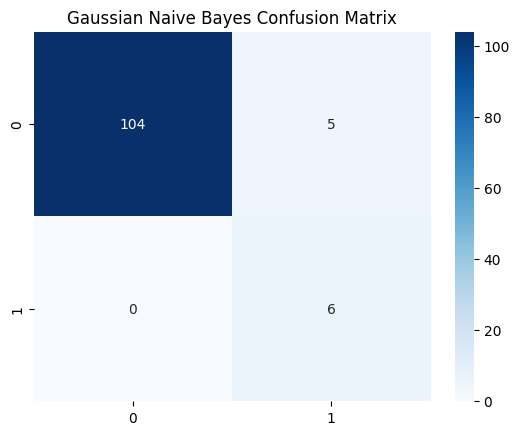

In [70]:
# Assuming y_test is your true labels and y_pred_gaussian is your predictions from Gaussian Naive Bayes
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
conf_matrix_gaussian = confusion_matrix(y_test, y_pred_gaussian)

print(f'Gaussian Naive Bayes Accuracy: {accuracy_gaussian*100:.2f}%')
sns.heatmap(conf_matrix_gaussian, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

Multinomial Naive Bayes Accuracy: 89.57%


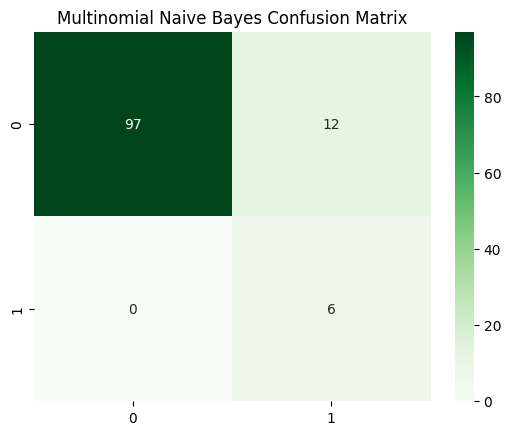

In [71]:
# Assuming y_pred_multinomial is your predictions from Multinomial Naive Bayes
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
conf_matrix_multinomial = confusion_matrix(y_test, y_pred_multinomial)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_multinomial*100:.2f}%')
sns.heatmap(conf_matrix_multinomial, annot=True, fmt='d', cmap='Greens')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.show()

Bernoulli Naive Bayes Accuracy: 99.13%


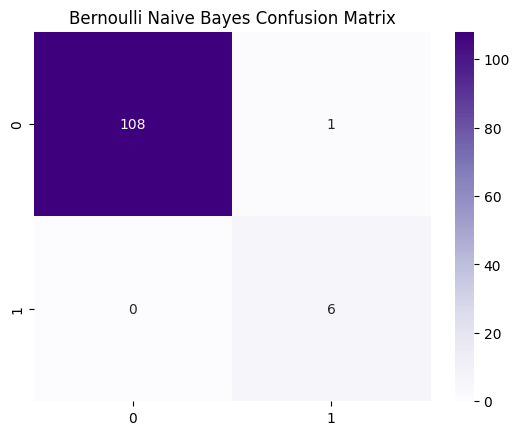

In [72]:
# Assuming y_pred_bernoulli is your predictions from Bernoulli Naive Bayes
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
conf_matrix_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)

print(f'Bernoulli Naive Bayes Accuracy: {accuracy_bernoulli*100:.2f}%')
sns.heatmap(conf_matrix_bernoulli, annot=True, fmt='d', cmap='Purples')
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.show()


/var/folders/9b/l1m8g_9s4tqc30j074jb3r140000gn/T/ipykernel_5473/3905905486.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Naive Bayes Type', y='Accuracy', data=df_accuracies, palette='viridis')


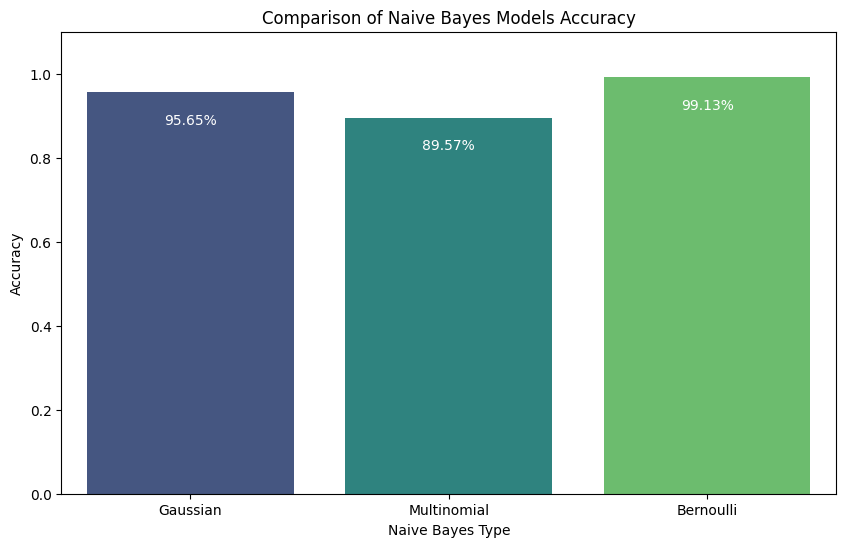

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame for the accuracies
data = {
    'Naive Bayes Type': ['Gaussian', 'Multinomial', 'Bernoulli'],
    'Accuracy': [accuracy_gaussian, accuracy_multinomial, accuracy_bernoulli]
}
df_accuracies = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Naive Bayes Type', y='Accuracy', data=df_accuracies, palette='viridis')

# Add labels inside the bars
for index, row in df_accuracies.iterrows():
    # Adjust the position of the text to be inside the bars
    barplot.text(index, row.Accuracy - 0.05, f'{row.Accuracy*100:.2f}%', color='white', ha="center", va="top")

plt.title('Comparison of Naive Bayes Models Accuracy')
plt.ylim(0, 1.1)  # Extend y-axis to make space for text if necessary
plt.show()